<a href="https://colab.research.google.com/github/SalarShafiee/ML-Projects/blob/main/thesis%2015.02.2025%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import gc
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm


AUTOTUNE = tf.data.experimental.AUTOTUNE

In [ ]:
import kagglehub

path = kagglehub.dataset_download("zygmuntyt/nutrition5k-dataset-side-angle-images")

print("Path to dataset files:", path)

100%|██████████| 5.97G/5.97G [01:03<00:00, 100MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zygmuntyt/nutrition5k-dataset-side-angle-images/versions/2


In [ ]:

#!sudo apt-get install google-cloud-sdk -y
#!gcloud auth login --quiet

!mkdir /content/nutrition5k/metadata/metadata/
!mkdir /content/nutrition5k/images



#!gsutil cp -r "gs://nutrition5k_dataset/nutrition5k_dataset/imagery/realsense_overhead/" /content/nutrition5k/images/


mkdir: cannot create directory ‘/content/nutrition5k/metadata/metadata/’: No such file or directory
mkdir: cannot create directory ‘/content/nutrition5k/images’: No such file or directory


In [ ]:
import pandas as pd
df=pd.read_excel('/content/sample_data/dish_metadata_cafe1 .xlsx')
df.head()

,dish_id,total_calories,total_mass,total_fat,total_carb,total_protein
0,dish_1550704750,136.949997,83.0,2.988,0.00,25.73
1,dish_1550704903,30.400000,76.0,0.152,6.84,1.52
2,dish_1550705288,77.000000,100.0,0.100,17.00,2.00
3,dish_1550705370,122.500000,49.0,7.350,0.00,12.74
4,dish_1550705445,4.000000,40.0,0.000,0.80,0.40


In [ ]:
import pandas as pd
import os
from glob import glob

# Assuming df is already loaded
df['path_to_images'] = ''

base_path = "/root/.cache/kagglehub/datasets/zygmuntyt/nutrition5k-dataset-side-angle-images/versions/2"

for index, row in df.iterrows():
    dish_id = row['dish_id']
    image_folder = os.path.join(base_path, dish_id, "frames_sampled30")

    if os.path.exists(image_folder):
        # Collect all image paths within the folder
        image_paths = glob(os.path.join(image_folder, "*.jpeg"))
        if image_paths:
            df.at[index, 'path_to_images'] = image_paths  # Store list of paths
        else:
            print(f"Warning: No images found for dish_id: {dish_id}")
            df.at[index, 'path_to_images'] = []
    else:
        print(f"Warning: Folder not found for dish_id: {dish_id}")
        df.at[index, 'path_to_images'] = []

df.head()

,dish_id,total_calories,total_mass,total_fat,total_carb,total_protein,path_to_images
0,dish_1550704750,136.949997,83.0,2.988,0.00,25.73,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
1,dish_1550704903,30.400000,76.0,0.152,6.84,1.52,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
2,dish_1550705288,77.000000,100.0,0.100,17.00,2.00,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
3,dish_1550705370,122.500000,49.0,7.350,0.00,12.74,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
4,dish_1550705445,4.000000,40.0,0.000,0.80,0.40,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...


In [ ]:


import pandas as pd

df.loc[df['path_to_images'].apply(lambda x: x == [] or x == ['image not found']), 'path_to_images'] = pd.NA

df

,dish_id,total_calories,total_mass,total_fat,total_carb,total_protein,path_to_images
0,dish_1550704750,136.949997,83.0,2.988000,0.000000,25.730000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
1,dish_1550704903,30.400000,76.0,0.152000,6.840000,1.520000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
2,dish_1550705288,77.000000,100.0,0.100000,17.000000,2.000000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
3,dish_1550705370,122.500000,49.0,7.350000,0.000000,12.740000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
4,dish_1550705445,4.000000,40.0,0.000000,0.800000,0.400000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
...,...,...,...,...,...,...,...
4763,dish_1568666230,55.800003,268.0,0.692000,10.969999,4.532000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
4764,dish_1568666263,93.400002,348.0,0.852000,19.770000,7.172000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
4765,dish_1568666303,443.199982,560.0,8.483999,19.770000,72.892006,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
4766,dish_1568666329,743.760010,594.0,42.484001,19.770000,72.891998,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...


In [ ]:

df = df.dropna()
df

,dish_id,total_calories,total_mass,total_fat,total_carb,total_protein,path_to_images
0,dish_1550704750,136.949997,83.0,2.988000,0.000000,25.730000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
1,dish_1550704903,30.400000,76.0,0.152000,6.840000,1.520000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
2,dish_1550705288,77.000000,100.0,0.100000,17.000000,2.000000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
3,dish_1550705370,122.500000,49.0,7.350000,0.000000,12.740000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
4,dish_1550705445,4.000000,40.0,0.000000,0.800000,0.400000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
...,...,...,...,...,...,...,...
4763,dish_1568666230,55.800003,268.0,0.692000,10.969999,4.532000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
4764,dish_1568666263,93.400002,348.0,0.852000,19.770000,7.172000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
4765,dish_1568666303,443.199982,560.0,8.483999,19.770000,72.892006,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
4766,dish_1568666329,743.760010,594.0,42.484001,19.770000,72.891998,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...


In [ ]:
df.shape

(4606, 7)

In [ ]:
import pandas as pd
import ast
import tensorflow as tf


def get_first_image(path_list):

    if isinstance(path_list, list) and path_list:
        return path_list[0]
    else:
        return None


df['first_image'] = df['path_to_images'].apply(get_first_image)


print(df[['first_image', 'total_carb']].head())

                                         first_image  total_carb
0  /root/.cache/kagglehub/datasets/zygmuntyt/nutr...        0.00
1  /root/.cache/kagglehub/datasets/zygmuntyt/nutr...        6.84
2  /root/.cache/kagglehub/datasets/zygmuntyt/nutr...       17.00
3  /root/.cache/kagglehub/datasets/zygmuntyt/nutr...        0.00
4  /root/.cache/kagglehub/datasets/zygmuntyt/nutr...        0.80


<ipython-input-7-270a62e65021>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_image'] = df['path_to_images'].apply(get_first_image)


In [ ]:
import pandas as pd
import ast
import tensorflow as tf
from sklearn.model_selection import train_test_split



train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.1765, random_state=42)


print(f"Train samples: {len(train_df)}, Val samples: {len(val_df)}, Test samples: {len(test_df)}")



IMG_SIZE = 128
BATCH_SIZE = 16


data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

def load_and_preprocess_image(image_path, target, augment=False):

    image = tf.io.read_file(image_path)

    image = tf.image.decode_jpeg(image, channels=3)

    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])

    image = image / 255.0

    if augment:
        image = data_augmentation(image)

    return image, tf.cast(target, tf.float32)

def create_dataset(df, augment=False, shuffle=False):
    paths = df['first_image'].values
    targets = df['total_carb'].values
    dataset = tf.data.Dataset.from_tensor_slices((paths, targets))

    dataset = dataset.map(lambda path, target: load_and_preprocess_image(path, target, augment=augment),
                          num_parallel_calls=tf.data.AUTOTUNE)
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    dataset = dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return dataset

train_ds = create_dataset(train_df, augment=False, shuffle=False).cache().prefetch(tf.data.AUTOTUNE)
val_ds = create_dataset(val_df, augment=False, shuffle=False).cache().prefetch(tf.data.AUTOTUNE)
test_ds = create_dataset(test_df, augment=False, shuffle=False).cache().prefetch(tf.data.AUTOTUNE)


Train samples: 3224, Val samples: 691, Test samples: 691


In [ ]:
! pip install vit-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.2 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
! pip install tensorflow==2.15.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:

from tensorflow import keras
from vit_keras import vit

vit_model = vit.vit_b16(
    image_size=IMG_SIZE,
    pretrained=True,
    include_top=False,
    pretrained_top=False
)


inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = vit_model(inputs)


outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


347502902/347502902 [==============================] - 3s 0us/step


/usr/local/lib/python3.11/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 8, 8
  warnings.warn(


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 vit-b16 (Functional)        (None, 768)               85697280  
                                                                 
 dense (Dense)               (None, 1)                 769       
                                                                 
Total params: 85698049 (326.91 MB)
Trainable params: 85698049 (326.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='mse',
    metrics=['mae']
)

NUM_EPOCHS = 5

history = model.fit(
    train_ds,
    epochs=NUM_EPOCHS,
    validation_data=val_ds)

Epoch 1/5
202/202 [==============================] - 2566s 13s/step - loss: 883.0381 - mae: 11.8497 - val_loss: 932.0644 - val_mae: 10.4486
Epoch 2/5
202/202 [==============================] - 2447s 12s/step - loss: 853.9424 - mae: 11.0354 - val_loss: 915.2415 - val_mae: 9.5572
Epoch 3/5
202/202 [==============================] - 2435s 12s/step - loss: 818.8589 - mae: 10.0849 - val_loss: 910.0474 - val_mae: 9.2153
Epoch 4/5
202/202 [==============================] - 2451s 12s/step - loss: 796.5716 - mae: 9.6386 - val_loss: 859.8839 - val_mae: 8.6632
Epoch 5/5
202/202 [==============================] - 2454s 12s/step - loss: 729.6912 - mae: 7.5887 - val_loss: 822.2098 - val_mae: 8.2425


In [ ]:

NUM_ADDITIONAL_EPOCHS = 10

history = model.fit(
    train_ds,
    epochs=NUM_ADDITIONAL_EPOCHS,
    initial_epoch=history.epoch[-1] + 1,
    validation_data=val_ds
)


Epoch 6/10
202/202 [==============================] - 2556s 13s/step - loss: 696.1545 - mae: 6.4724 - val_loss: 780.2873 - val_mae: 7.7647
Epoch 7/10
202/202 [==============================] - 2479s 12s/step - loss: 670.6758 - mae: 5.6065 - val_loss: 806.0383 - val_mae: 9.1017
Epoch 8/10
202/202 [==============================] - 2477s 12s/step - loss: 657.8527 - mae: 5.2853 - val_loss: 768.2852 - val_mae: 7.0190
Epoch 9/10
202/202 [==============================] - 2468s 12s/step - loss: 648.8397 - mae: 5.1424 - val_loss: 796.2943 - val_mae: 6.4044
Epoch 10/10
202/202 [==============================] - 2512s 12s/step - loss: 634.2302 - mae: 4.5227 - val_loss: 822.5075 - val_mae: 7.0688


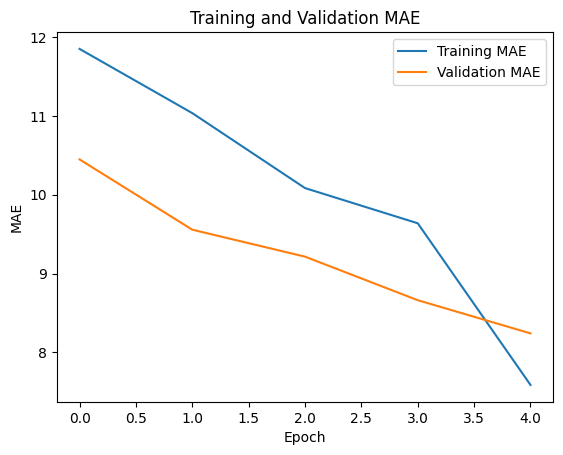

In [ ]:



plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()


In [ ]:


import numpy as np

results = model.evaluate(test_ds)


print("Test Loss:", results[0])
print("Test MAE:", results[1])



predictions = model.predict(test_ds)

true_values = test_df['total_carb'].values


mape = np.mean(np.abs((true_values - predictions.flatten()) / true_values)) * 100

print(f"Mean Absolute Percentage Error (MAPE) on the test dataset: {mape:.2f}%")


44/44 [==============================] - 154s 3s/step - loss: 469.9777 - mae: 8.2972
Test Loss: 469.9776611328125
Test MAE: 8.29715347290039
44/44 [==============================] - 162s 4s/step
Mean Absolute Percentage Error (MAPE) on the test dataset: inf%


<ipython-input-12-8af1c7d63195>:25: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((true_values - predictions.flatten()) / true_values)) * 100
